# Exploratory Data Analysis - Car Sales
####                                                               - 'Vivek Gulavani'

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling - Preprocessing](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Observations](#section306)<br/>
- 4. [Data Normalization](#section4)</br>
    - 4.1 [Duplicate,Missing and zero value data and its imputation](#section401)<br/>
    - 4.2 [Outlier Treatment](#section402)<br/>
    - 4.3 [Label Encoding & Adding of New Columns](#section403)<br/>
    - 4.4 [Corelations](#section404)<br/>
    - 4.5 [Post Normalization Profiling](#section405)<br/>
- 5. [Identify Patterns in the Data](#section5)</br>
    - 5.1 [Car Brands Pattern](#section501)<br/>
    - 5.2 [Body Type, Engine Type, Drive Pattern](#section502)<br/>
    - 5.3 [Body - Engine Type Pattern](#section503)<br/>
    - 5.4 [Engine Type - Drive Pattern](#section504)<br/>
    - 5.5 [Brand - Engine Type Pattern](#section505)<br/>
    - 5.6 [Brand - Drive Pattern](#section506)<br/>
    - 5.7 [Body - Drive Pattern](#section507)<br/>
    - 5.8 [Brand - Body Type Pattern](#section508)<br/>
    - 5.9 [Registration Spread](#section509)<br/>
    - 5.10 [Price Range Pattern](#section510)<br>
- 6. [Analysis through questions](#section6)</br>
    - 6.1 [Which brands contribute to the Top-10 priced cars?](#section601)<br/>
    - 6.2 [What is the trend of price wrt age of the car?](#section602)<br/>
    - 6.3 [What is the trend of price wrt age and brand of the car?](#section603)<br/>
    - 6.4 [What is the trend of price wrt mileage?](#section604)<br/>
    - 6.5 [What is the trend of price wrt body type? Does particular body type of cars are priced higher over others?](#section605)<br/>
    - 6.6 [What is the price trend for cars Registered/Non-Registered in Ukraine?](#section606)<br/>
    - 6.7 [What is the price trend for cars with different engine type?](#section607)<br/>
    - 6.8 [What is the trend of price wrt Engine Volume?](#section608)<br/>
    - 6.9 [What is the range of enginge volume for the cars?](#section609)<br/>
    - 6.10 [Which year are the maximum cars registered on?](#section610)<br/>
    - 6.11 [What is the age range spread of the car?](#section611)<br/>
    - 6.12 [What is the price range wrt respect to top 10 most sold car brands?](#section612)<br/>
    - 6.13 [Which engine type cars have higher mileage?](#section613)<br/>
- 7. [Conclusion](#section7)<br/>

<a id=section1></a> 
## 1. Problem Statement 
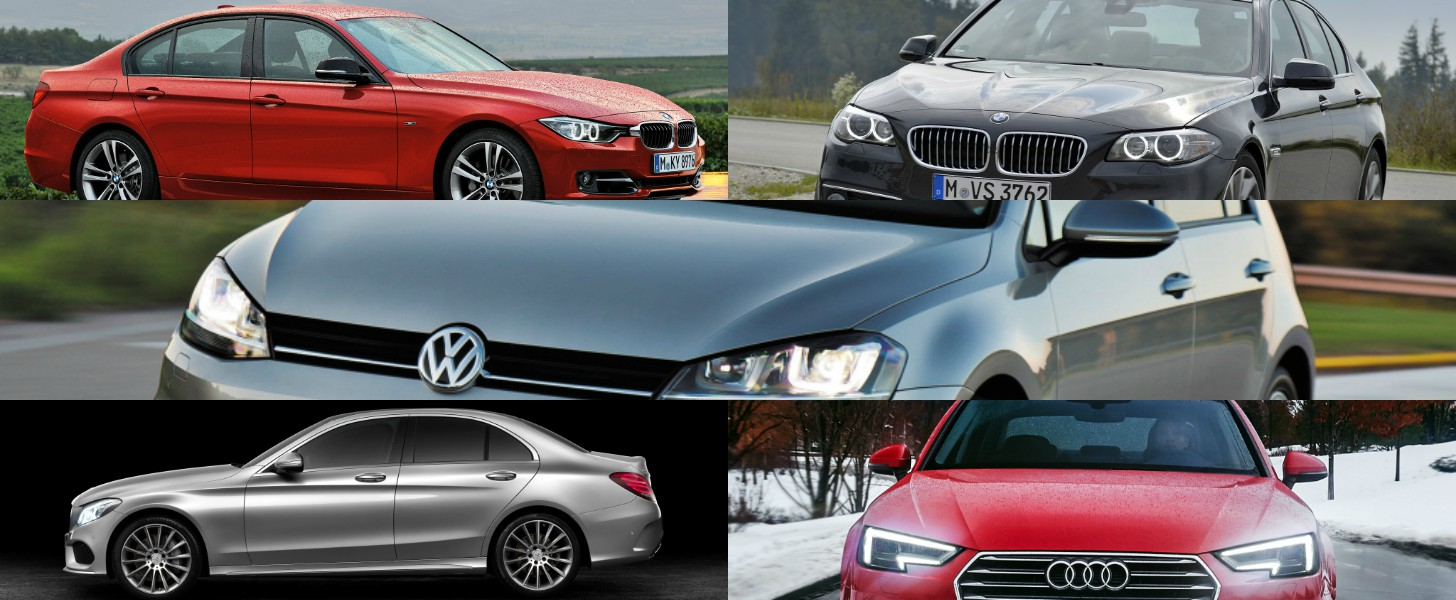

This dataset was collected from car sale advertisements in 2016.
The dataset includes advertisement data and not the data pertaining to actual sales of the used cars.

The EDA is done in order to help the enterprise which does the sell of used cars in Ukraine.

The EDA needs to come up with the analysis in order to provide following insigts:
1. The used car seller is an enterprise which is in the business of selling used cars in Ukraine. 
2. The enterprise wants to come up with the strategy on used car sells.
3. The EDA needs to provide analysis on data patterns and actionable insights to the enterpise.
3. The EDA needs to  provide following insights based on the patterns observed in the dataset:
   - Insights on Brand, Body Type, Engine Type & Drive on how they contribute to the overall used car market.
   - Trend of price wrt to features provided in the dataset.
   - Spot the clear outliers in the dataset.
   - Prsent the analysis to the CEO so that the insights can help the the enterprise to prepare the following stategy:
     -  Decide which buyer segment needs to be targeted for which type of car.
     -  Analyse the advertimsement given by Seller and help the seller to decide right target price and also as a result provide better customer expereice.

<a id=section101></a> 
### 1.1  Introduction
Based on the dataset provided the Exploratory Data Analysis is carried out in order to achieve following objectives:
1. Corelate various features in this dataset and identify different patterns in the data.
2. Analyse and describe the trend between the featues and the price quoted for the respective car.
3. Identify the feature having strong corelation with price.
4. Based on the identified patterns and analysed data provide actionable insights for the user car sellling Enterprise.


<a id=section102></a> 
### 1.2. Data source and dataset

    
This dataset contains data for more than 9.5K cars sale in Ukraine. Most of them are used cars so it opens the possibility to analyze features related to car operation. At the end of the day I look at this data as a subset from all Ukrainian car fleet.

Dataset contains 9576 rows and 10 variables with essential meanings:

1. car: manufacturer brand
2. price: seller’s price in advertisement (in USD)
3. body: car body type
4. mileage: as mentioned in advertisement (‘000 Km)
5. engV: rounded engine volume (‘000 cubic cm)
6. engType: type of fuel (“Other” in this case should be treated as NA)
7. registration: whether car registered in Ukraine or not
8. year - year of car registration
9. model - Model of the car
10. drive - Type of drive - Rear


<a id=section2></a> 
## 2. Load Pacakages & Data

In [187]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline
import seaborn as sns

carsalesData = pd.read_csv('car_sales.csv',encoding='iso8859_2')


<a id=section3></a>
## 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301></a> 

In [188]:
carsalesData.dtypes         # Display the data type for each variable

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

<a id=section302></a>

##### 4 numerical and 6 categorical datatypes

In [189]:
carsalesData.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


<a id=section303><a/>

In [190]:
carsalesData.describe()     # Descriptive statistics for the numerical variables

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


<a id=section304></a>

In [191]:
carsalesData.sample(10) # Display a random 10 rows from the data set

,car,price,body,mileage,engV,engType,registration,year,model,drive
7553,VAZ,2650.0,sedan,101,1.5,Petrol,yes,2005,21099,front
4412,Daewoo,3900.0,sedan,129,1.5,Petrol,yes,2008,Lanos,front
9353,Peugeot,12100.0,vagon,171,1.6,Diesel,yes,2010,5008,front
2316,Renault,5900.0,hatch,171,1.5,Other,yes,2005,Megane,front
2984,Opel,1499.0,sedan,260,2.5,Petrol,no,1997,Omega,front
6938,Audi,7800.0,sedan,90,2.2,Gas,yes,1994,S4,full
1748,Mercedes-Benz,11200.0,sedan,198,6.0,Petrol,yes,2004,S 600,rear
1048,Ford,19800.0,crossover,113,2.0,Diesel,yes,2014,Kuga,full
2245,Skoda,21300.0,sedan,2,1.4,Petrol,yes,2016,Octavia A7,front
6057,Opel,6850.0,vagon,212,2.5,Diesel,yes,2002,Omega,rear


<a id=section305><a/>

In [192]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(carsalesData)
profile.to_file("carsalespreprofile.html")                              # HTML file will be downloaded to your workspace

<a id=section306></a> 
### 3.6. Observations
1. Summary of data types in this dataset:
   - Numeric: engV, mileage, price, year
   - Categorical: body, car, drive, engType, model
   - Boolean: registration
2. Duplicate Rows:
   - Dataset has 113 duplicate rows. Duplicate rows might cause bias so needs to be dropped retaining the first row.
3. Missing Values:
   - There are values 'other' and 462 'Other' in body and engType columns. These also need to be treated as missing values and solution needs to be derived for the same.
   - drive has 511 missing values - Its an important technical parameter - Need to be checked if we can update this based on other records with same car, body, model or need to be dropped/ if we keep as is the impact to be analysed.
   - engV has 434 missing values - It is important in analysing the car specs important from decision making point of view. We need to see if we can update it based on other records of car with same model etc or we might have to drop it being an important parameter for decision making from buyer's point of view.
4. Zero Value: 
   - Price has 267 (2.8%) 'zero' values - This needs to be analyzed and decision to be taken as zero price would not add any value in the EDA
   - mileage has 348 (3.6%) 'zero' values - This needs to be analyzed and decision to be taken as zero mileage would not add any value in the EDA
5. Possible Outliers:
   - Max price is 547800 whereas mean of price is 15633.317316. Is this possible indication of outliers or there are few cars which are premium and come in high price category?
   - Max mileage is 999 where as mean is 138.86. Again here as well there seems to be possibility of outlier. 
   - engV - Again mean is 2.64 where as max is 99.99. Possiblitiy of outliers.
6. Different Character Codes:
   - The model column has some non-Elglish characters. Needs to be analyzed if the same needs cleanup.
7. Car Registration Year:
   - The min value for this is 1953. From buyer's perspective buying a vintage car as old as 1953 is not very common. The cars with very old registration needs to be removed from the analysis as we are targetting normal car buyer here for the analysis.

<a id=section4></a> 
### 4. Data Normalization

<a id=section401></a> 
#### 4.1 Duplicate, Missing and zero value data and its imputation

#### Duplicate Rows

In [193]:
#Drop The Duplicate Rows and create another dataframe for carring out analysis
analysisData = carsalesData.drop_duplicates()

In [194]:
#Check the shape after dropping duplicates
analysisData.shape

(9463, 10)

#### Other Values

- There are values 'other' and 'Other' in engType and drive columns. These needs to be treated as None.
- Check if we can derive the body value based on frequent occurences of body for some other unique combination of columns
- Body values are derived based on combination of car and model. The 'mode' of body for same combination of car and model is used to update the 'other' value.
- Remaining rows with body as 'other' are not considered for analysis as they don't add value for a buyer to make decision 

In [195]:
# Update the other/Other values to NaN
analysisData.loc[analysisData.body == 'other','body'] = np.nan
analysisData.loc[analysisData.engType == 'Other','engType'] = np.nan

In [196]:
print(analysisData[pd.isnull(analysisData.body)].car.count())
print(analysisData[pd.isnull(analysisData.engType)].car.count())

829
462


In [197]:
# Derive the body for given 'car' and 'model' based on mode of whole data set for same combination
def getFreqBody(cars):
    if cars.count() > 0:
        return cars.mode() 
    else:                 
        return None
    
freqBody = analysisData.groupby(['car','model'])['body'].apply(getFreqBody)

#Drop Index created due to group by clause
freqBody = freqBody.reset_index()

freqBody.drop(columns='level_2',axis=1,inplace=True)

In [199]:
# For the missing body values update the derived body above
def updateBody(cars):
    if(pd.isnull(cars.body)):
        #print(cars.car, cars.model)
        body = freqBody[(freqBody.car == cars.car) & (freqBody.model == cars.model)].body.values
        if(len(body) != 0):
            return body[0]
        else:
            return None
    else:
        return cars.body
    
analysisData.body = analysisData.apply(updateBody,axis=1)

print(analysisData[pd.isnull(analysisData.body)].car.count())


171


In [200]:
#171 body rows with None couldn't be updated so drop the same
analysisData.dropna(subset=['body'],inplace=True)

In [201]:
print(analysisData.shape)
print(analysisData[pd.isnull(analysisData.engType)].car.count())

(9292, 10)
454


In [202]:
# Derive the engType for given 'car','model' and engV based on mode of whole data set for same combination
def getFreqEngType(cars):
    if cars.count() > 0:
        return cars.mode() 
    else:                 
        return None
    
freqEng = analysisData.groupby(['car','model','engV'])['engType'].apply(getFreqEngType)

#Drop Index created due to group by clause
freqEng= freqEng.reset_index()

freqEng.drop(columns='level_3',axis=1,inplace=True)


In [203]:
# For the missing engType values update the derived engine type above
def updateEtype(cars):
    if(pd.isnull(cars.engType)):
        eType = freqEng[(freqEng.car == cars.car) & (freqEng.model == cars.model)\
                        & (freqEng.engV == cars.engV)].engType.values
        if(len(eType) != 0):
            return eType[0]
        else:
            return None
    else:
        return cars.engType
    
analysisData.engType = analysisData.apply(updateEtype,axis=1)

print(analysisData[pd.isnull(analysisData.engType)].car.count())

245


In [204]:
# 209 null values for EngType are updated, 245 couldn't be updated so drop the rows with EngType as null
analysisData.dropna(subset=['engType'],inplace=True)

In [205]:
print(analysisData.shape)
print(analysisData[pd.isnull(analysisData.engType)].car.count())

(9047, 10)
0


#### Missing Values

In [206]:
#There are 409 rows with drive as null
# Try to update the drive with mode for the same combination of car, model in overall data

def getModeDrive(cars):
    if cars.count() > 0:
        return cars.mode() 
    else:                 
        return None
    
modeDrive = analysisData.groupby(['car','model'])['drive'].apply(getModeDrive)

#Drop Index created due to group by clause
modeDrive = modeDrive.reset_index()
modeDrive.drop(columns='level_2',axis=1,inplace=True)

In [207]:
print(analysisData[pd.isnull(analysisData.drive)].car.count())

# For the missing engType values update the derived engine type above
def updateDrive(cars):
    if(pd.isnull(cars.drive)):
        drive = modeDrive[(modeDrive.car == cars.car) & (modeDrive.model == cars.model)].drive.values
        if(len(drive) != 0):
            return drive[0]
        else:
            return None
    else:
        return cars.drive
    
analysisData.drive = analysisData.apply(updateDrive,axis=1)

409


In [208]:
print(analysisData[pd.isnull(analysisData.drive)].car.count()) 

13


There are only 13 rows remaining with drive as null let's keep them as it is because drive is not as significant as engType or engV or body and buyer could still analyse the data based on other parameters.

In [209]:
# Analyse the rows with Zero Mileage
print(analysisData[analysisData.mileage == 0].year.mean())
print(analysisData[analysisData.mileage == 0].year.min())
print(analysisData[analysisData.mileage == 0].car.count())

2015.7979452054794
2009
292


#### Zero Values

##### Mileage

Results show that the cars with mileage zero are between year 2009 to 2016 and most of them around 2016 as the mean indicates.
Let's see the trend on the bar plot

Text(0.5, 0, 'Registration Year')

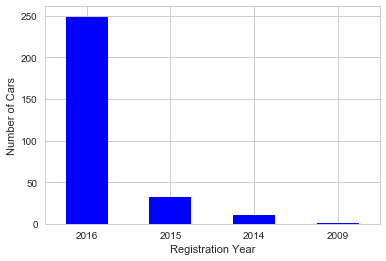

In [210]:
ax = analysisData[analysisData.mileage == 0]['year'].value_counts().plot.bar(color='blue',rot=0)
ax.set_ylabel('Number of Cars')
ax.set_xlabel('Registration Year')

The bar plot clearly shows that most of the cars are registered betwen 2014-2016 and only one car is registered in 2009
Considering that the cars are new and would still attract buyer's interest we can derive the mileage by taking median of the mileage of the cars registered after 2009.

Let's analyse which type of cars (body type) have zero mileage

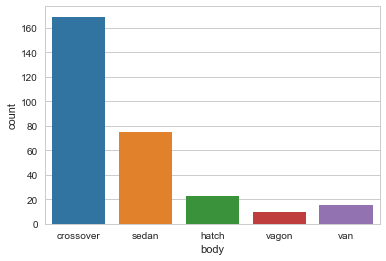

In [211]:
sns.countplot(x='body',data=analysisData[analysisData.mileage == 0])

Most of the cars with zero mileage are crossover (approx 170) out of 231

In [212]:
#Get median of mileage for car, model, engV and engType combination for cars registrered after 2009
def getmedM(cars):
    if cars.count() > 0:
        #print(cars.median)
        return cars.median() 
    else:                 
        return np.nan


medM = analysisData[analysisData.year >= 2009].groupby(['car','model','engV','engType'])['mileage'].apply(getmedM)

medM= medM.reset_index()

In [213]:
# For the zero mileage values update the median mileage obtained above for cars with year >= 2009
def updateMileage(cars):
    if(cars.mileage == 0):
        mileage = medM[(medM.car == cars.car) & (medM.model == cars.model)\
                        & (medM.engV == cars.engV) & (medM.engType == cars.engType)].mileage.values
        if(len(mileage) != 0):
            return mileage[0]
        else:
            return cars.mileage
    else:
        return cars.mileage

analysisData.mileage = analysisData.apply(updateMileage,axis=1)

print(analysisData[analysisData.mileage == 0].car.count())


120


##### Check the distribution after updating the zero mileage values

Text(0.5, 0, 'Registration Year')

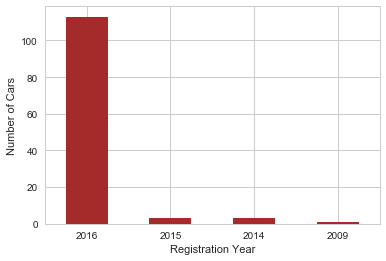

In [214]:
ax = analysisData[analysisData.mileage == 0]['year'].value_counts().plot.bar(color='brown',rot=0)
ax.set_ylabel('Number of Cars')
ax.set_xlabel('Registration Year')

There are still 115 rows with mileage 0 but we will keep those as they would be useful for other variable co-relations and analysis

Also the fact is that 110 out of these cars are registered in 2016 which means are these are recent purchases and should be retained for further analysis.


##### Body wise distrution of zero mileage cars after update

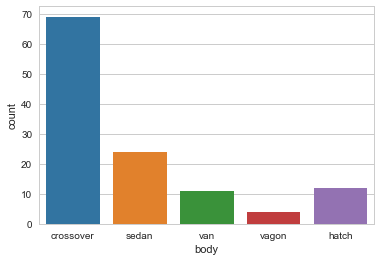

In [215]:
sns.countplot(x='body',data=analysisData[analysisData.mileage == 0])

##### Price

In [216]:
print(analysisData[analysisData.price == 0].year.describe())

count     231.000000
mean     2009.064935
std         8.206049
min      1963.000000
25%      2007.000000
50%      2012.000000
75%      2015.000000
max      2016.000000
Name: year, dtype: float64


##### There are 231 values with price zero. Let's analyse the pattern of zero price further

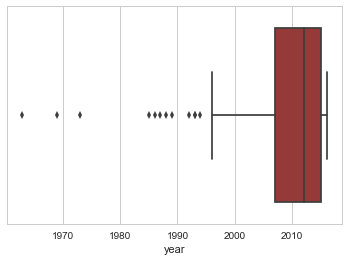

In [217]:
sns.boxplot(analysisData[analysisData.price==0].year,color='brown')

In [218]:
analysisData[analysisData.price == 0].describe()

,price,mileage,engV,year
count,231.0,231.000000,226.000000,231.000000
mean,0.0,101.987013,3.222655,2009.064935
std,0.0,97.211657,6.572722,8.206049
min,0.0,0.000000,0.800000,1963.000000
25%,0.0,16.000000,2.000000,2007.000000
50%,0.0,70.000000,2.500000,2012.000000
75%,0.0,162.000000,3.000000,2015.000000
max,0.0,450.000000,99.990000,2016.000000


The Q1 is at 2007 while Q3 is at 2015 and mean beeing at 2009.
The Box Plot show 11 outliers below 1997.

Based on this let's see the counts of cars with zero values after 2007


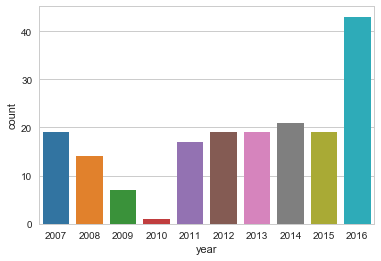

In [219]:
sns.countplot(x='year',data=analysisData[(analysisData.price == 0) & (analysisData.year >= 2007)])

Let's see the body and engType wise counts for zero price.

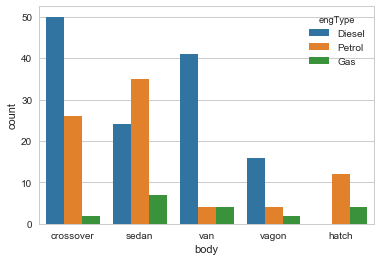

In [220]:
sns.countplot(x='body',data=analysisData[analysisData.price == 0],hue='engType')

Crossover and Sedan are top two contributors in zero price values

As price is very important feature and is a target in this analysis we would not do any updates to price as well as we are not doing ML here to predict the price hence will maintain this data as is and would use it for other variable analysis. We would limit our scope only to EDA and descriptive analysis in this case.

<a id=section402><a/> 

#### 4.2 Outlier Treatment

In [221]:
# Analyse the the registration year outliers
print('Mean of Year:',analysisData.year.mean())
print('Minimum Reg Year:',analysisData.year.min())
print('Max Reg Year:',analysisData.year.max())
print('Total Rec Count:',analysisData.year.count().sum())
print('Cars Older than 1980:',analysisData[analysisData.year < 1980].count().sum())


Mean of Year: 2006.4885597435614
Minimum Reg Year: 1953
Max Reg Year: 2016
Total Rec Count: 9047
Cars Older than 1980: 407


Let's retain all the cars for time being to use the older car for price trend analysis later on

##### Registration Year Outliers

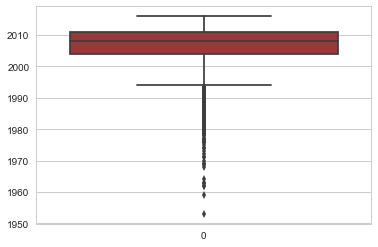

In [222]:
sns.boxplot(data=analysisData.year,color='brown')

#### Distribution of cars across the registration year

In [223]:
analysisData.year.describe()

count    9047.000000
mean     2006.488560
std         6.967174
min      1953.000000
25%      2004.000000
50%      2008.000000
75%      2011.000000
max      2016.000000
Name: year, dtype: float64

In [224]:
#The Boxplot clearly indicates that there are multiple outliers.
analysisData.year.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0    1953.0
0.1    1997.0
0.2    2002.0
0.3    2005.0
0.4    2007.0
0.5    2008.0
0.6    2008.0
0.7    2011.0
0.8    2012.0
0.9    2014.0
1.0    2016.0
Name: year, dtype: float64

In [133]:
print(analysisData[analysisData.year < 1993].car.count()) # Lesser than Q1 - 1.5IQR (minimum of the box plot)

484


The percentile values clearly indicates that 90% of the cars registration year is after 1997 and their are around 484 outliers.
We will keep this as it is however need to analyse further and might have to ignore when we are anlysing the patterns.

##### Price Outliers

Text(0.5, 1.0, 'Price Outliers')

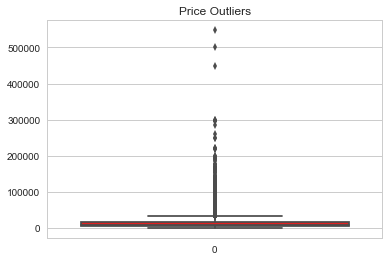

In [225]:
ax = sns.boxplot(data=analysisData.price,color='red')
ax.set_title('Price Outliers')

In [226]:
analysisData.price.describe()

count      9047.000000
mean      14857.576649
std       22505.815567
min           0.000000
25%        4950.000000
50%        8999.000000
75%       15999.000000
max      547800.000000
Name: price, dtype: float64

The Box is very much flat in this case. IQR is smaller and many outliers on the uppper side. These cars needs to be further analysed during the pattern analysis.


In [227]:
analysisData[analysisData.price > (15999 + 1.5*(15999 - 4950))].car.count()

814

##### let's analyse spread of these price outliers

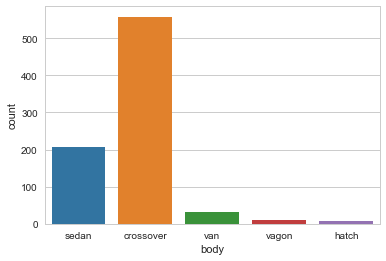

In [228]:
sns.countplot(x='body',data=analysisData[analysisData.price > (15999 + 1.5*(15999 - 4950))])

Let's check distribution of outliers wrt registration year

In [229]:
analysisData[analysisData.price > (15999 + 1.5*(15999 - 4950))].year.value_counts()

2016    199
2013    126
2011    100
2014     99
2012     94
2015     75
2010     59
2009     23
2008     23
2006      5
2007      4
2005      3
2004      1
2002      1
2001      1
1969      1
Name: year, dtype: int64

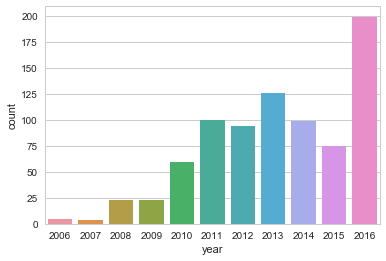

In [230]:
sns.countplot(x='year',data=analysisData[(analysisData.price > (15999 + 1.5*(15999 - 4950)))\
                                         & (analysisData.year > 2005)])

In [231]:
analysisData[analysisData.price > (15999 + 1.5*(15999 - 4950))].body.value_counts()

crossover    558
sedan        206
van           32
vagon         11
hatch          7
Name: body, dtype: int64

##### Crossover type of cars and registration done in 2016 are respectively contributing maximum to the price outliers. We would need to analyse these outliers further

<a id=section403><a/>

#### 4.3 Catrgorical Variables Encoding and Addition of New Columns
Add new columns and Encode Body, EngType and Drive Categorical Variables to numerical to assit corelations and machine learning models later on

#### 'age' Column

#### Add 'age' column to the data frame as 'Age' of the used car will provide better analysis from buiyer's perspective.
##### This way Buyer can use the EDA even in years later than 2016 to get the insigths based on age of the car.

In [232]:
analysisData['age'] = 2016 - analysisData['year']
analysisData

,car,price,body,mileage,engV,engType,registration,year,model,drive,age
0,Ford,15500.000,crossover,68.0,2.50,Gas,yes,2010,Kuga,full,6
1,Mercedes-Benz,20500.000,sedan,173.0,1.80,Gas,yes,2011,E-Class,rear,5
3,Mercedes-Benz,17800.000,van,162.0,1.80,Diesel,yes,2012,B 180,front,4
5,Nissan,16600.000,crossover,83.0,2.00,Petrol,yes,2013,X-Trail,full,3
6,Honda,6500.000,sedan,199.0,2.00,Petrol,yes,2003,Accord,front,13
7,Renault,10500.000,vagon,185.0,1.50,Diesel,yes,2011,Megane,front,5
8,Mercedes-Benz,21500.000,sedan,146.0,1.80,Gas,yes,2012,E-Class,rear,4
9,Mercedes-Benz,22700.000,sedan,125.0,2.20,Diesel,yes,2010,E-Class,rear,6
10,Nissan,20447.154,crossover,15.0,1.20,Petrol,yes,2016,Qashqai,front,0
11,Mercedes-Benz,20400.000,sedan,190.0,1.80,Gas,yes,2011,E-Class,rear,5


##### Price Group Bins Addition

Add Price Group Bins - As the price range is too high however the mean price is lower, let's create price bins to understand the distribution of price wrt to these bins

In [233]:
analysisData['priceGroup'] = pd.cut(analysisData['price'],[0,30000,60000,90000,120000,600000], 
                                labels = ['<30K','30-59K','60-89K','90-119K','>120K'], include_lowest = True)
analysisData['priceGroup'] = analysisData['priceGroup'].astype(object)

analysisData

,car,price,body,mileage,engV,engType,registration,year,model,drive,age,priceGroup
0,Ford,15500.000,crossover,68.0,2.50,Gas,yes,2010,Kuga,full,6,<30K
1,Mercedes-Benz,20500.000,sedan,173.0,1.80,Gas,yes,2011,E-Class,rear,5,<30K
3,Mercedes-Benz,17800.000,van,162.0,1.80,Diesel,yes,2012,B 180,front,4,<30K
5,Nissan,16600.000,crossover,83.0,2.00,Petrol,yes,2013,X-Trail,full,3,<30K
6,Honda,6500.000,sedan,199.0,2.00,Petrol,yes,2003,Accord,front,13,<30K
7,Renault,10500.000,vagon,185.0,1.50,Diesel,yes,2011,Megane,front,5,<30K
8,Mercedes-Benz,21500.000,sedan,146.0,1.80,Gas,yes,2012,E-Class,rear,4,<30K
9,Mercedes-Benz,22700.000,sedan,125.0,2.20,Diesel,yes,2010,E-Class,rear,6,<30K
10,Nissan,20447.154,crossover,15.0,1.20,Petrol,yes,2016,Qashqai,front,0,<30K
11,Mercedes-Benz,20400.000,sedan,190.0,1.80,Gas,yes,2011,E-Class,rear,5,<30K


In [234]:
adNew = analysisData.copy(deep=True)   

In [235]:
from sklearn.preprocessing import LabelEncoder                                    
number = LabelEncoder()  

                                                       
adNew.body = number.fit_transform(adNew.body.astype('str'))
adNew.engType = number.fit_transform(adNew.engType.astype('str'))
adNew.registration = number.fit_transform(adNew.registration.astype('str'))
adNew.drive = number.fit_transform(adNew.drive.astype('str'))
adNew.car = number.fit_transform(adNew.car.astype('str'))
adNew.model = number.fit_transform(adNew.model.astype('str'))

adNew

,car,price,body,mileage,engV,engType,registration,year,model,drive,age,priceGroup
0,22,15500.000,0,68.0,2.50,1,1,2010,422,2,6,<30K
1,47,20500.000,2,173.0,1.80,1,1,2011,282,3,5,<30K
3,47,17800.000,4,162.0,1.80,0,1,2012,187,1,4,<30K
5,52,16600.000,0,83.0,2.00,2,1,2013,736,2,3,<30K
6,29,6500.000,2,199.0,2.00,2,1,2003,162,1,13,<30K
7,57,10500.000,3,185.0,1.50,0,1,2011,487,1,5,<30K
8,47,21500.000,2,146.0,1.80,1,1,2012,282,3,4,<30K
9,47,22700.000,2,125.0,2.20,0,1,2010,282,3,6,<30K
10,52,20447.154,0,15.0,1.20,2,1,2016,564,1,0,<30K
11,47,20400.000,2,190.0,1.80,1,1,2011,282,3,5,<30K


<a id=section404><a/>

#### 4.4 Corelations
Price vs all features

In [236]:
corr=adNew.corr()['price']
corr[np.argsort(corr,axis=0)[::-1]]

price           1.000000
year            0.372867
drive           0.204906
model           0.145372
registration    0.122165
engV            0.053959
engType        -0.039706
car            -0.076339
body           -0.250242
mileage        -0.289922
age            -0.372867
Name: price, dtype: float64

#### Price Corelation Observations
Year, Drive, model, registration have strong positive corelation with price.
Age, Mileage, body have strong negative corelation with price.

Year/Age shows the highest corelation with Price. This means price is lesser for cars registered earlier/used for more number of years.

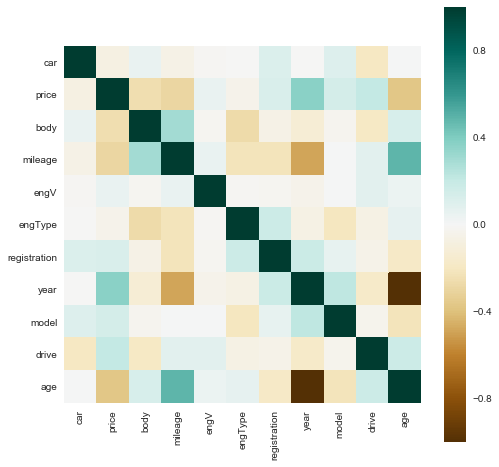

In [237]:
features_correlation = adNew.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='BrBG')
plt.show()

<a id=section405><a/>

#### 4.5 Post Normalization Profiling

In [238]:
postprofile = pandas_profiling.ProfileReport(analysisData)
postprofile.to_file("carsalespostprofile.html")  

<a id=section5><a/>

  
### 5. Identify patterns in the data

<a id=section501><a/>

####  5.1 Car Brands Pattern

As there are 79 car brands in the data.
Let's analyse Top-10 brands as per their contribution to the data.


Text(0, 0.5, 'Percentage Cars')

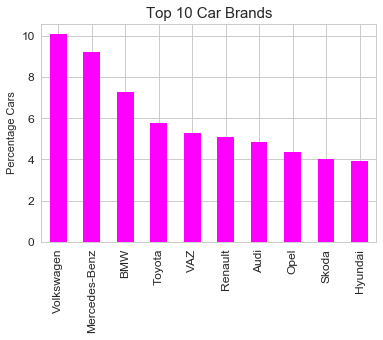

In [148]:
brandcounts = analysisData['car'].value_counts()[:10]/len(analysisData)*100
ax = brandcounts.plot.bar(color='magenta',fontsize=12)

ax.set_title('Top 10 Car Brands', fontsize=15)
ax.set_ylabel('Percentage Cars')

#### Analysis
The maximuum share of data is by 'Volkswagen'(10.1%) followed by Mercendes-Benz (9.2%) and BMW(7.3%). 

This indicates that German car manufactures dominates the Ukraine Used car sales market.

Top 10 brands contribute to the 60% of the used car sales data.
Remaining 69 brands contribute to remaining 40% data.




<a id=section502><a/>

#### 5.2 Body Type, Engine Type,Drive Pattern

Text(0.5, 1.0, 'Drive Spread')

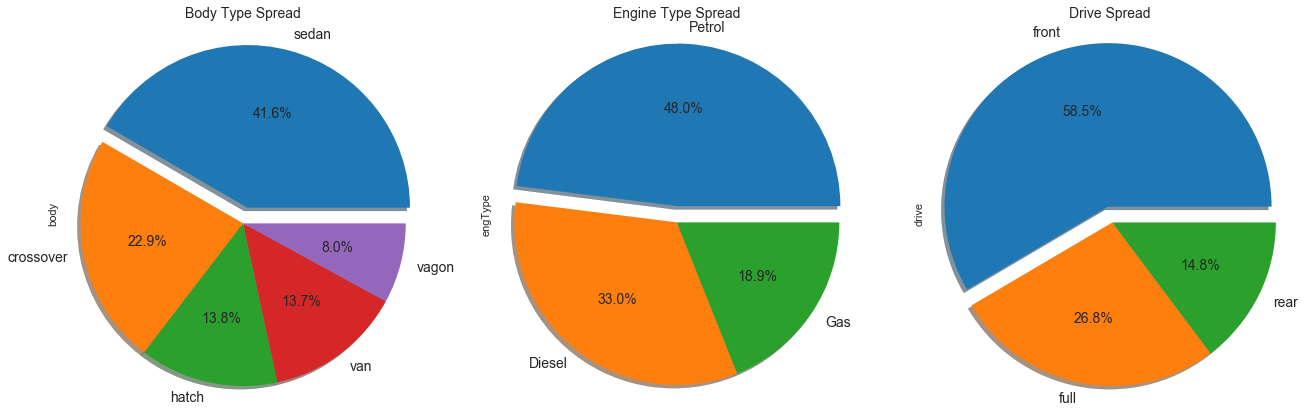

In [149]:
f,ax = plt.subplots(1,3,figsize=(22,7))
analysisData.body.value_counts().plot.pie(explode=(0.1,0,0,0,0),autopct='%1.1f%%',\
                                          ax=ax[0],shadow=True,textprops={'fontsize': 14})
analysisData.engType.value_counts().plot.pie(explode=(0.1,0,0),\
                                             autopct='%1.1f%%',ax=ax[1],shadow=True,textprops={'fontsize': 14})
analysisData.drive.value_counts().plot.pie(explode=(0.1,0,0),autopct='%1.1f%%',\
                                           ax=ax[2],shadow=True,textprops={'fontsize': 14})

ax[0].axis('equal')
ax[1].axis('equal')
ax[2].axis('equal')

ax[0].set_title('Body Type Spread',fontsize = 14)
ax[1].set_title('Engine Type Spread',fontsize = 14)
ax[2].set_title('Drive Spread',fontsize = 14)


Sedan, Petrol & Front Drive contribute most to the car sales data.

<a id=section503><a/>

#### 5.3 Body - Engine Type Pattern

<a id=section503><a/>

Text(0.5, 0, 'Car')

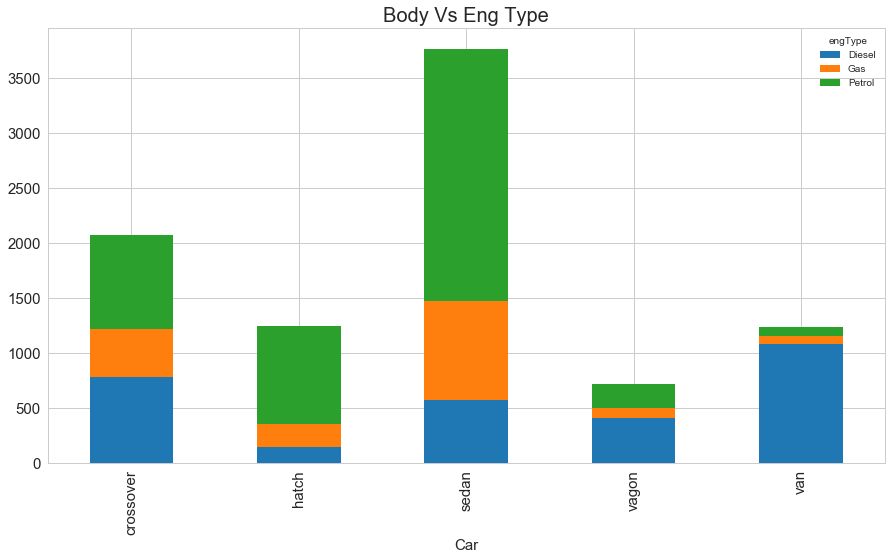

In [150]:
ax = analysisData.groupby(['body', 'engType']).size().unstack()\
.plot(kind='bar',stacked=True,figsize=(15,8),fontsize=15)
ax.set_title('Body Vs Eng Type',fontsize=20)
ax.set_xlabel('Car',size=15)


Expect Van and Vagon all other categories shows higher value of Petrol Cars.
Sedan has complete dominance by Petrol Engine Type.


<a id=section504><a/>

#### 5.4 Engine Type Drive Pattern

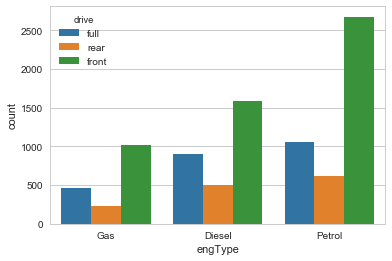

In [151]:
sns.countplot(x='engType',data=analysisData,hue='drive')

##### Observations
Each Engine Type has maximum number of cars as front drive followed by full and then rear drive

<a id=section505><a/>

#### 5.5 Brand - Engine Type Pattern

Let's analyse the eng type spread for top-10 brands

Volkswagen       913
Mercedes-Benz    836
BMW              658
Toyota           521
VAZ              478
Renault          462
Audi             438
Opel             393
Skoda            363
Hyundai          353
Name: car, dtype: int64
['Volkswagen', 'Mercedes-Benz', 'BMW', 'Toyota', 'VAZ', 'Renault', 'Audi', 'Opel', 'Skoda', 'Hyundai']


Text(0.5, 0, 'Car')

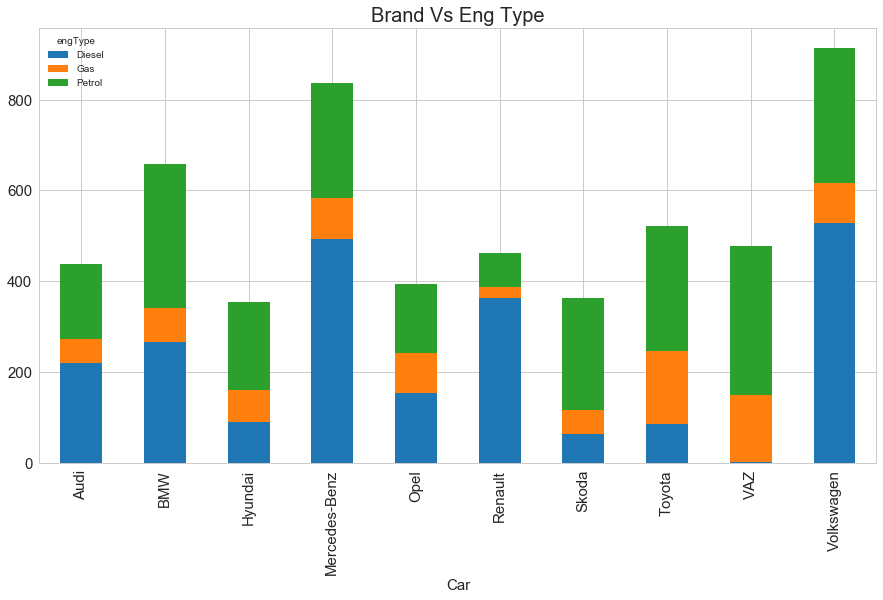

In [152]:
t10cars = analysisData.car.value_counts()[:10]
print(t10cars)
t10cars=list(t10cars.index)
print(t10cars)

carCat = analysisData[analysisData['car'].isin(t10cars)]

ax = carCat.groupby(['car', 'engType']).size().unstack()\
.plot(kind='bar',stacked=True,figsize=(15,8),fontsize=15)
ax.set_title('Brand Vs Eng Type',fontsize=20)
ax.set_xlabel('Car',size=15)

##### Observations:
Most the brands have Petrol as higher number of engine Types.
Volkswagen, Audi, Renault shows reverse trend wherein higher number of cars are Diesel.
Toyota shows highest number of Gas Cars among top 10 brands. 

<a id=section506><a/>

#### 5.6 Brand - Drive Pattern

Let's analyse the Drive spread for top-10 brands

Text(0.5, 0, 'Car')

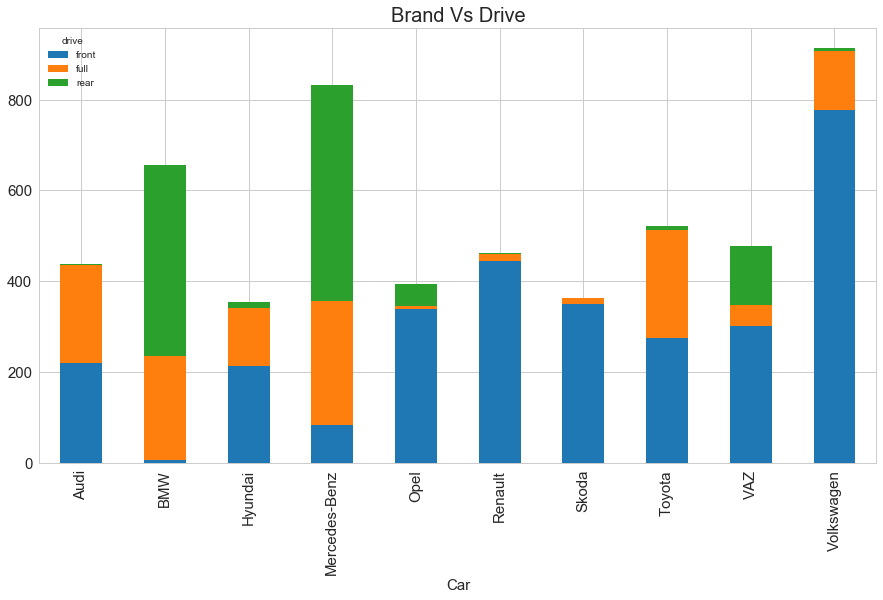

In [153]:
ax = carCat.groupby(['car', 'drive']).size().unstack()\
.plot(kind='bar',stacked=True,figsize=(15,8),fontsize=15)
ax.set_title('Brand Vs Drive',fontsize=20)
ax.set_xlabel('Car',size=15)

Mercedes-Benz has more number of cars with 'rear' drive
All other brands show 'rear' as lowest number of drive
Volkswagen and Toyota have almost negligible amount of rear drive cars


<a id=section507><a/>

#### 5.7 Body - Drive Pattern

Text(0.5, 1.0, 'Body Vs Drive')

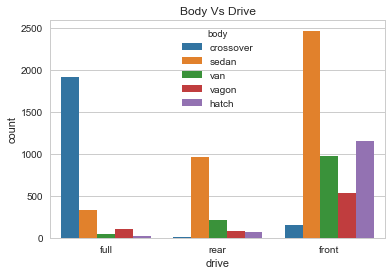

In [154]:
ax = sns.countplot(x='drive',data=analysisData,hue='body')
ax.set_title('Body Vs Drive')

Most of the crossover cars are with full drive and almost no with rear drive
Front Drive dominates Sedan
Most of the hatch are with front drive with little presence of full and rear drive.


<a id=section508><a/>

#### 5.8 Brand - Body Type Pattern

Let's analyse the Body Type spread for top-10 brands

Text(0.5, 0, 'Car')

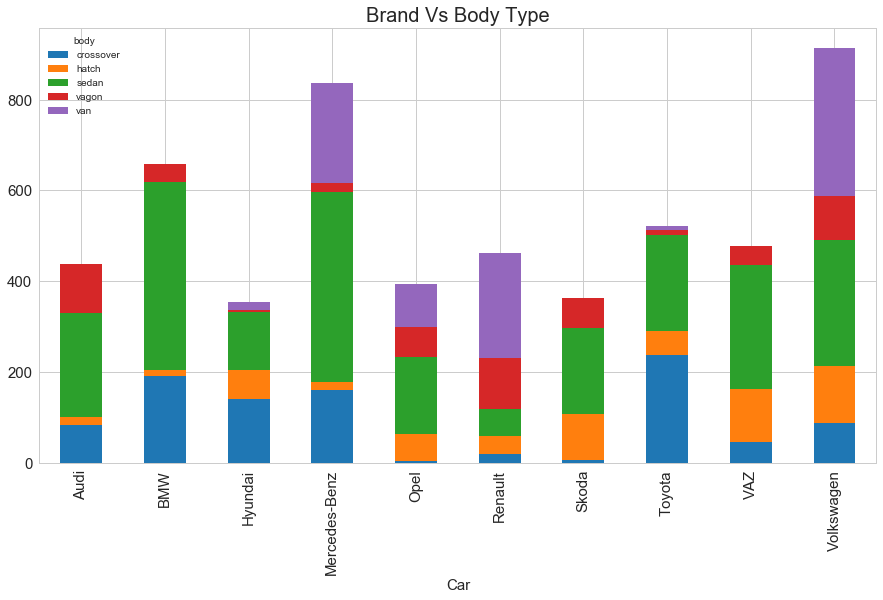

In [155]:
ax = carCat.groupby(['car', 'body']).size().unstack()\
.plot(kind='bar',stacked=True,figsize=(15,8),fontsize=15)
ax.set_title('Brand Vs Body Type',fontsize=20)
ax.set_xlabel('Car',size=15)

Volkswagen has spread across all the body types.
Mercedes and BMW has very few hatch back type of car.
Sedan dominates Mercedes Benz and BMW

<a id=section509><a/>

#### 5.9 Registration Spread

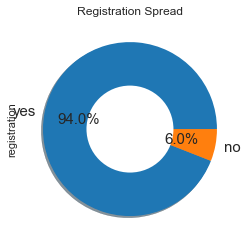

In [156]:
regcounts = analysisData.registration.value_counts()
ax = regcounts.plot.pie(autopct='%1.1f%%',shadow=True,fontsize=15)
circle = plt.Circle(xy=(0, 0), radius=0.5, facecolor='white')
plt.gca().add_artist(circle)

ax.set_title("Registration Spread")

plt.show()

##### Observations
94% of the cars are registered in Ukraine.
6% of the cars are not registered in Ukraine

<a id=section510><a/>

<a id=section6><a/>

#### 5.10 Price Range Pattern

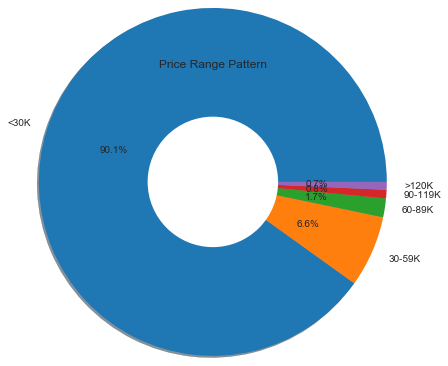

In [157]:

carCounts = (analysisData['priceGroup'].value_counts() / len(analysisData) *100)
ax = carCounts.plot.pie(autopct='%1.1f%%',shadow=True,radius=2,fontsize=10)
ax.set_title("Price Range Spread")

circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)

ax.set_title("Price Range Pattern")

plt.show()

90% of the cars are below the price range of 30K


### 6. Analysis Through Questions

<a id=section601><a/>

#### 6.1 Which brands contribute to the Top-10 priced cars?

Text(0.5, 1.0, 'Top Priced Cars')

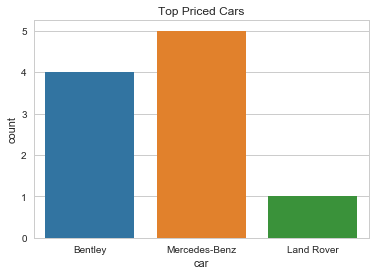

In [158]:
ax = sns.countplot(x='car',data=analysisData.nlargest(10,'price'))
ax.set_title('Top Priced Cars')

In [159]:
analysisData.nlargest(3,'price')

,car,price,body,mileage,engV,engType,registration,year,model,drive,age,priceGroup
7621,Bentley,547800.0,sedan,0.0,6.75,Petrol,yes,2016,Mulsanne,rear,0,>120K
1611,Bentley,499999.0,crossover,0.0,6.00,Petrol,yes,2016,Bentayga,full,0,>120K
4134,Bentley,449999.0,crossover,0.0,6.00,Petrol,yes,2016,Bentayga,full,0,>120K


Let's analyse Bentley brand more.
The topmost price is for 'Bentley' 'Mulsanne' model.
This is the only car available in the entire dataset.
This indicates this is a luxary car and comes in higly expensive category.
Let's see trend of price for Bentley car.

<a id=section602><a/>

#### 6.2 What is the trend of price wrt age of the car?

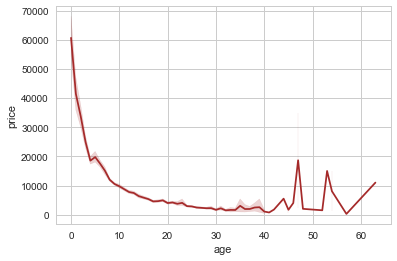

In [160]:
sns.lineplot(data=analysisData[analysisData.price != 0],x='age',y='price', color='brown')


The price wrt age is negaively co-related.
More is the age lesser is the price.
Particulary after first 2-3 years of age there is stip drop in the price.
However there is some spike between 40-50 years of age as well as between 50 to 60 and above 60 years of age.
Let's analyse further about these spikes.

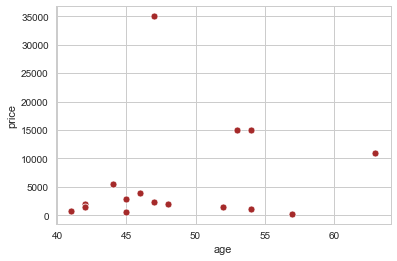

In [161]:
sns.scatterplot(data=analysisData[(analysisData.price != 0) & (analysisData.age >40)],x='age',y='price',color='brown')

There are four clear outliers for the price of this car in the age above 40. 
Rest all cars are priced below 10000.

Let's analyse further about the outliers.

In [162]:
display(analysisData[(analysisData.age > 40)& (analysisData.price > 10000)])

display(analysisData[(analysisData.car == 'GAZ') & (analysisData.model == '21')])

display(analysisData[(analysisData.car == 'Mercedes-Benz') & (analysisData.model == 'S 280')])

display(analysisData[(analysisData.car == 'Moskvich-AZLK') & (analysisData.model == '401')])

,car,price,body,mileage,engV,engType,registration,year,model,drive,age,priceGroup
4165,GAZ,15000.0,sedan,1.0,12.0,Petrol,yes,1962,21,rear,54,<30K
4737,GAZ,15000.0,sedan,40.0,2.5,Petrol,yes,1963,21,rear,53,<30K
6004,Moskvich-AZLK,11000.0,sedan,1.0,NaN,Petrol,yes,1953,401,rear,63,<30K
8284,Mercedes-Benz,34999.0,sedan,150.0,2.8,Petrol,yes,1969,S 280,rear,47,30-59K


,car,price,body,mileage,engV,engType,registration,year,model,drive,age,priceGroup
4165,GAZ,15000.00,sedan,1.0,12.0,Petrol,yes,1962,21,rear,54,<30K
4737,GAZ,15000.00,sedan,40.0,2.5,Petrol,yes,1963,21,rear,53,<30K
5010,GAZ,259.35,sedan,1.0,2.4,Petrol,yes,1959,21,rear,57,<30K
6349,GAZ,4000.00,sedan,98.0,2.4,Petrol,yes,1970,21,rear,46,<30K
8512,GAZ,0.00,sedan,1.0,2.4,Petrol,yes,1969,21,front,47,<30K
8660,GAZ,1100.00,sedan,35.0,NaN,Gas,yes,1962,21,rear,54,<30K
8727,GAZ,2000.00,sedan,70.0,70.0,Petrol,yes,1968,21,rear,48,<30K
8985,GAZ,2350.00,sedan,1.0,1.8,Petrol,yes,1969,21,rear,47,<30K


,car,price,body,mileage,engV,engType,registration,year,model,drive,age,priceGroup
8284,Mercedes-Benz,34999.0,sedan,150.0,2.8,Petrol,yes,1969,S 280,rear,47,30-59K
8499,Mercedes-Benz,2990.0,sedan,300.0,2.8,Gas,yes,1979,S 280,rear,37,<30K


,car,price,body,mileage,engV,engType,registration,year,model,drive,age,priceGroup
6004,Moskvich-AZLK,11000.0,sedan,1.0,NaN,Petrol,yes,1953,401,rear,63,<30K


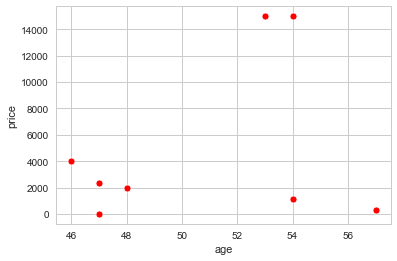

In [163]:
sns.scatterplot(data = analysisData[(analysisData.car == 'GAZ') &\
                                    (analysisData.model == '21')],x='age',y='price', color='red')

It indicates that the two GAZ cars are outliers clearly above other cars with same brand and model. Also all of the cars with this make and model are older than 45 years. It could be very much possible that these models are obsolete now.

For Mercedes and Moskvich there is not much data available hence can't do more analysis on outliers.

Moskvich seems to be the only single row available in entire data set.
Moskvich is Russian brand which has been shutdown long ago so definitely the price is clear outlier and risky from buyer's point of view.

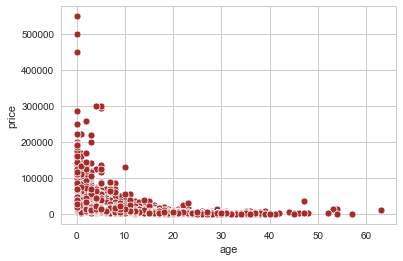

In [164]:
sns.scatterplot(data=analysisData[analysisData.price != 0],x='age',y='price', color='brown')


Price has strong negative corelation wrt age. Older cars are priced lesser than newyer cars.

<a id=section603><a/>

#### 6.3 What is the trend of price wrt age and brand of the car?

Let's consider only top 4 brands as per their contribution to the overall dataset and also which suggests that these are 4 preferred brands in Ukraine.

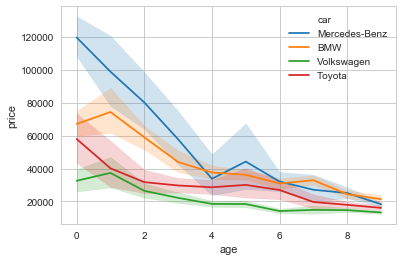

In [165]:
topCarlist = ['Volkswagen','Toyota','Mercedes-Benz','BMW']

topCardata = analysisData[analysisData['car'].isin(topCarlist)].dropna()
topCardata=topCardata[(topCardata.age < 10) & (topCardata.price > 10000)]
sns.lineplot(data=topCardata,x='age',y='price',hue='car',color='brown')

Overall Mercedes and BMW cars are priced higher followed by Toyota and then Volkswagen.
Mercedes and BMW shows stip price drop between 0-4 years age compare to Toyota and VW.
Toyota seems to show lesser drop in price between 2-6 years than any other cars.
Although other factors need to be analyzed this indicates that Toyota seems tobe retaining the price between 2-6 years.

<a id=section604><a/>

#### 6.4 What is the trend of price wrt mileage?

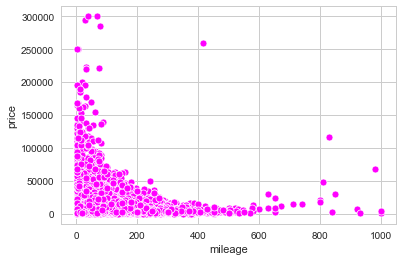

In [166]:
sns.scatterplot(x='mileage',y='price',data=analysisData[analysisData.mileage != 0],color='magenta')

Most of the cars mileage is between 0 to 600
Price reduces with mileage so it is negatively corelated with mileage.

<a id=section605><a/>

#### 6.5 What is the trend of price wrt body type? Does particular body type of cars are priced higher over others?

Text(0.5, 1.0, 'Body Type Price Distribution')

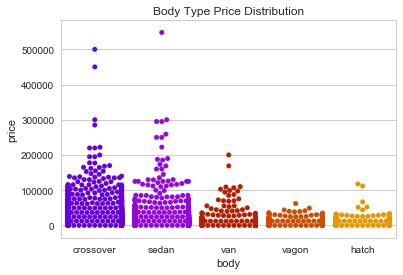

In [167]:
ax = sns.swarmplot(x="body", y="price",palette='gnuplot', data=analysisData)
ax.set_title('Body Type Price Distribution')

The trend shows that Hatch, Wagon, van price distribution range is lower.
Sedan has slightly higher range of price distribution.
Crossover has highest price distribution range.

<a id=section606><a/>

#### 6.6 What is the price trend for cars Registered/Non-Registered in Ukraine?

Text(0.5, 1.0, 'Registration Price Spread')

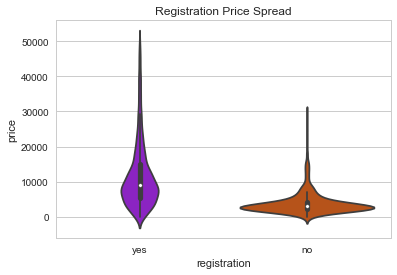

In [168]:
# To get better comparison restricting the price to 50,000
ax = sns.violinplot(x="registration", y="price", palette="gnuplot",\
                    data=analysisData[analysisData.price < 50000])
ax.set_title('Registration Price Spread')

Cars not registered in Ukraine shows distribution in lower price range. Clear indication that the price for non-registered cars is lower.

However considering that they would need registration as per regulations, the overall price will include additional registration expenses. So based on this we can not conclude if buying cars not registered in Ukraine will result in lower overall price.

<a id=section607><a/>

#### 6.7 What is the price range of cars with different engine type?

Text(0.5, 1.0, 'Engine Type Price Spread')

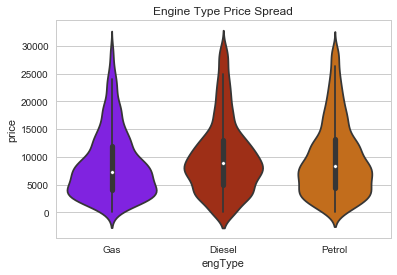

In [169]:
ax = sns.violinplot(x="engType", y="price", palette="gnuplot",\
                    data=analysisData[analysisData.price<30000])
ax.set_title('Engine Type Price Spread')

The Price distribution of the cars clearly shows following ascending pricing range order:
    - Gas
    - Petrol
    - Diesel

<a id=section608><a/>

#### 6.8 What is the price trend for cars wrt engine Volume?

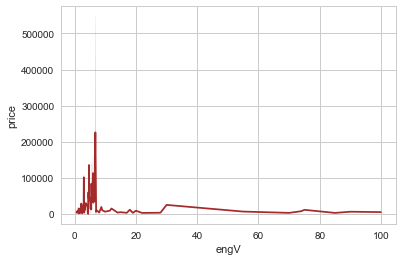

In [170]:
sns.lineplot(data=analysisData[analysisData.engV!=0],x='engV',y='price',color='brown')

The relation between engine Volume and price seems to flat post 20 so let's analyse between 20.

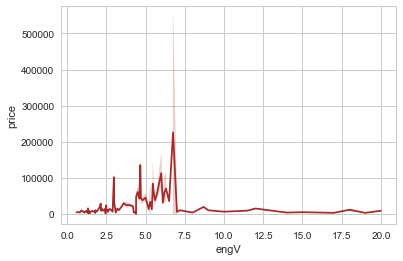

In [171]:
data = analysisData[(analysisData.engV > 0) & (analysisData.engV <= 20)]
sns.lineplot(data=data,x='engV',y='price',color='brown')

The engine volume and price have slightly positive corelation

<a id=section609><a/>

<a id=section609><a/>

#### 6.9 What is the range of enginge volume for the cars?

In [172]:
analysisData['volumeRange'] = pd.cut(analysisData['engV'],[0,2,3,6,10,20,100], 
                                labels = ['<2','2-3','3-6','6-10','10-20','>20'], include_lowest = True)
analysisData['volumeRange'] = analysisData['volumeRange'].astype(object)

In [173]:
vCounts= analysisData.volumeRange.value_counts()
vCounts

<2       5445
2-3      2236
3-6      1036
6-10       39
>20        34
10-20      13
Name: volumeRange, dtype: int64

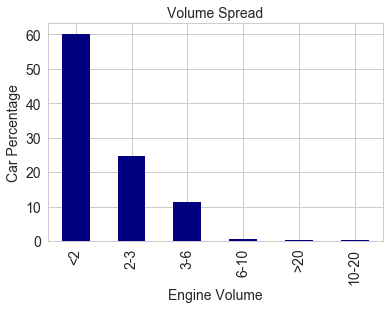

In [174]:
vCounts= (analysisData.volumeRange.value_counts()/len(analysisData))*100
ax = vCounts.plot.bar(colormap='jet',fontsize=14)
#ax = sns.countplot(x='volumeRange',data=analysisData,hue='body')
ax.set_title("Volume Spread",fontsize=14)
ax.set_xlabel("Engine Volume",fontsize=14)
ax.set_ylabel("Car Percentage", fontsize=14)

plt.show()

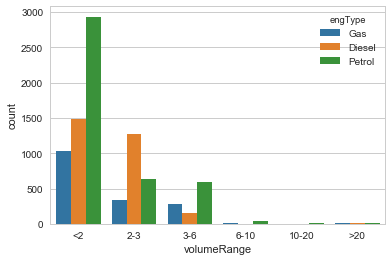

In [175]:
sns.countplot(x='volumeRange',hue='engType',data=analysisData,order=['<2','2-3','3-6','6-10','10-20','>20'])

Most of the engines have volume less than 2.
Between 2-3 range Diesel are the maximum engines.
Between 3-6 petrol are the maximum engines.
There are very few engines above volume 6.

<a id=section610><a/>

#### 6.10 Which year are the maximum cars registered on?

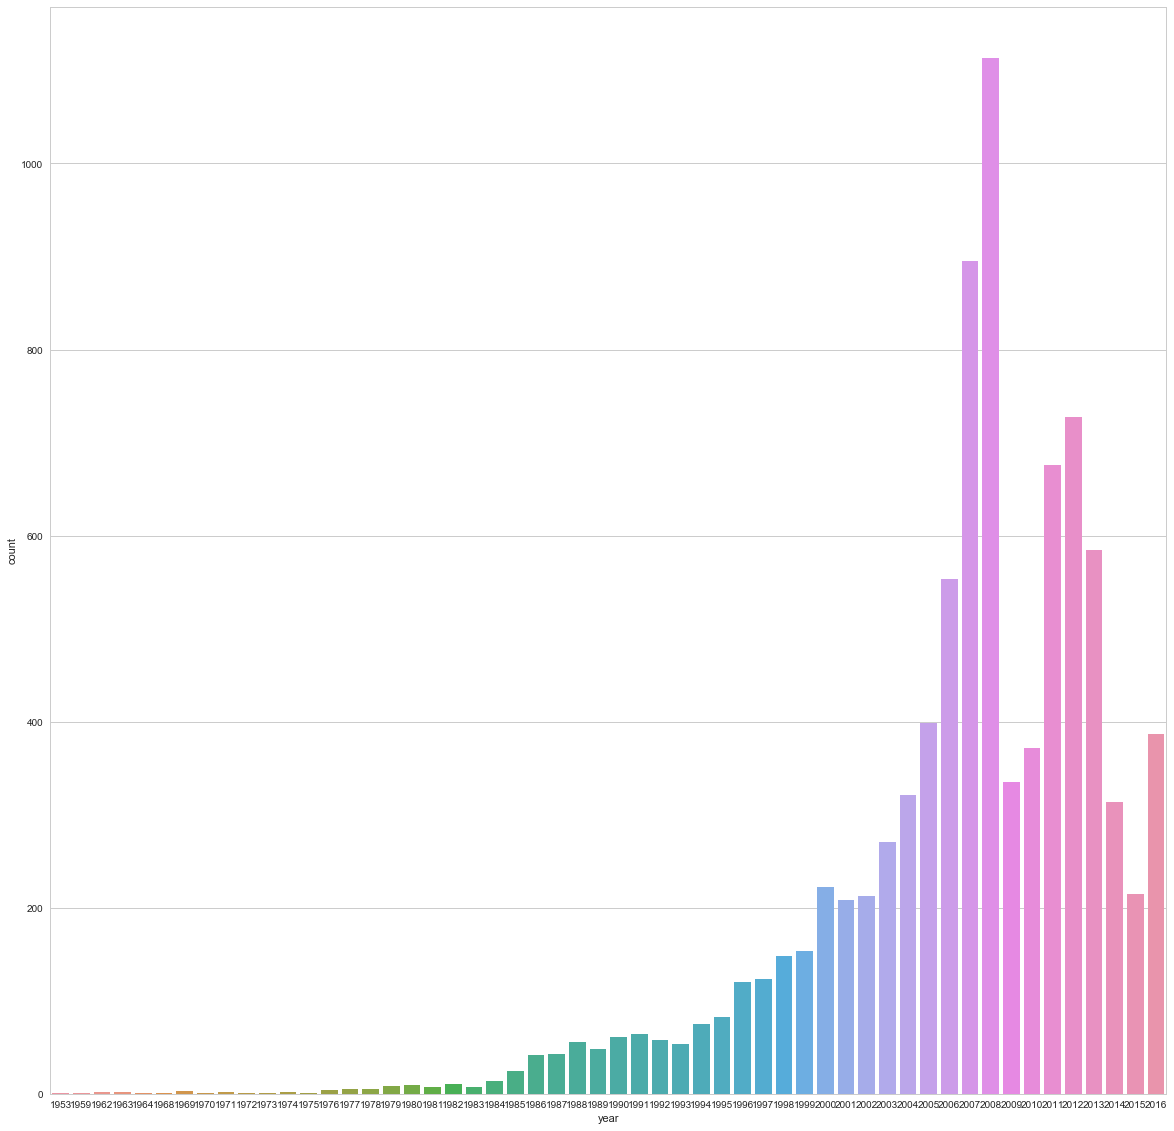

In [176]:
plt.figure(figsize=(20,20))
sns.countplot(x='year',data=analysisData)

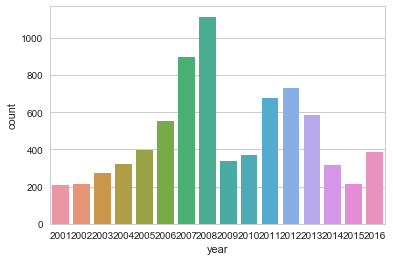

In [177]:
# As most of the cars are registered later part let's focus on year>2000 to get year with max registrations
sns.countplot(x='year',data=analysisData[analysisData.year > 2000])

<a id=section610><a/>

##### Observations
Maximum cars are registered in 2008

<a id=section611><a/>

#### 6.11 What is the age range spread of the car?

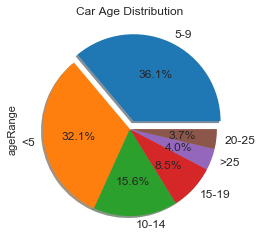

In [178]:
analysisData['ageRange'] = pd.cut(analysisData['age'],[0,5,10,15,20,25,100], 
                                labels = ['<5','5-9','10-14','15-19','20-25','>25'], include_lowest = True)
analysisData['ageRange'] = analysisData['ageRange'].astype(object)
aCounts= analysisData.ageRange.value_counts()
aCounts= (analysisData.ageRange.value_counts()/len(analysisData))*100
ax = aCounts.plot.pie(autopct='%1.1f%%',shadow=True,fontsize=12,explode=(0.1,0,0,0,0,0),title='Car Age Distribution')
#ax.set_title('Cage Age Distribution')



<a id=section612><a/>

#### 6.12 What is the price range wrt respect to top 10 most sold car brands?

Text(0.5, 0, 'Car')

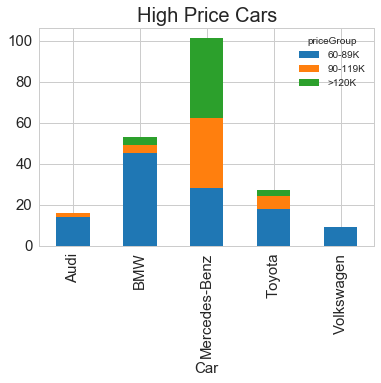

In [179]:
hp = carCat[carCat.price > 60000]
ax = hp.groupby(['car', 'priceGroup']).size().unstack()\
.plot(kind='bar',stacked=True,fontsize=15)
ax.set_title('High Price Cars',fontsize=20)
ax.set_xlabel('Car',size=15)


Within top-10 cars Mercedes Benz has higher number of cars in the high price range followed by BMW.

In [180]:
analysisData[(analysisData.car == 'Volkswagen') & (analysisData.engType == 'Petrol')].count()

car             297
price           297
body            297
mileage         297
engV            289
engType         297
registration    297
year            297
model           297
drive           297
age             297
priceGroup      297
volumeRange     289
ageRange        297
dtype: int64

<a id=section613><a/>

##### 6.13 Mileage vs Engine Type

<a id=section7><a/>

Text(0.5, 1.0, 'Average Mileage vs Engine Type')

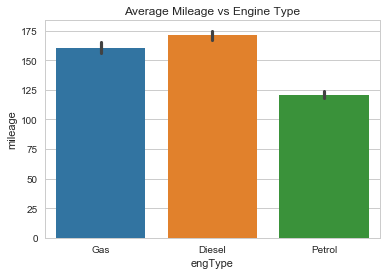

In [186]:
ax = sns.barplot(x='engType', y='mileage', data=analysisData[analysisData.mileage != 0])
ax.set_title('Average Mileage vs Engine Type')

Text(0.5, 1.0, 'Average Age Vs Engine Type')

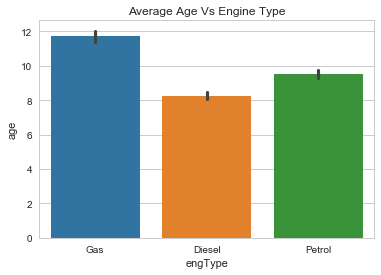

In [185]:
ax = sns.barplot(x='engType',y='age',data=analysisData)
ax.set_title('Average Age Vs Engine Type')

Average Mileage of Diesel and Gas cars is higher than Petrol cars. 
Average age of diesel car is lesser than Petrol but still mileage is higer.

This indicates that diesel cars could be used more for commercial purpose and hence their mileage is higher.

### 7. Conclusion
##### EDA Findings Summary
1. Data Composition:
 - The Ukraine Car Sales advertisement data helps to find out the most used cars as well as the corelation between price and the key parameters impacting the used car.
 - Total 9576 car advertisement data collected till 2016 was provided for the analysis out of which 9047 records were used for EDA after data transformation.
2. Zero/Missing value analysis:
   - Most of the cars with zero mileage are registered in 2016. These are all new cars recently pruchased so would have clokced very less distance.
   - Maximum cars with zero price are registered in 2016. 
3. Data Patterns:
 - Sedan,Petrol Engine and Front drive is the most widely used combination in Ukraine.
 - Volkswagen, Mercedes Benz, BMW, Toyota, VAZ, Renault, Audi, Opel, Skoda, Hyundai are Top-10 car brands contributing to the dataset. The top 10 brands contribute to 60% of the data and rest of 69 brands contribute to 40% of the data.
 - Most of the car brands in the Top-10 have higher number of Petrol cars than diesel however Volkswagen, Renault & Audi shows reverse trend of higher Diesel cars than Petrol cars.
 - Although most preferable cars are Petrol the top most brand Volkswagen has more Diesel cars.
 - Gas is the least preferred engine type.
 - Rear drive is the least amogst all. Mercedes Benz has highest number of Rear Drive cars amongst the Top-10 brands.
 - Crossover contributes most to the Full drive cars. Sedan and Hatchbacks are mostly front drive cars.
 - 94% cars are registered in Ukraine whereas 6% are not registered in Ukraine.
 - 68% of the total cars are below 9 years of usage.
 - Maximum cars are registered in year 2008
 - 90% of the cars are registered after 1997 (upto used car age 19 years)
 - Average mileage of diesel cars is highest followed by Gas and then Petrol.
 - Agerage age of diesel cars is lesser than others.
4. Corelations of the features with Price:
    - Price is negatively co-related with age. Paricularly after 2-3 years of age the price drop is hiher. 
    - Car age/registration year is the strongest corelated/imacpting feature with price.
    - Mileage, Body, Drive,Registration follows it in decending order of co-relation
5. Price Patterns
    - 90% of the cars are priced lower than 30,000
    - Bentley, Mercedes Benz and Land Rover contributes to the top-10 priced cars.
    - There are 4 clear outliers for the cars aged above 40 years. Further analysis indicates that two GAZ make car seems to indicate that they are clear outliers.
    - Overall Mercedes & BMW cars average prices are higher. There is stip drop of price between 0-4 years for Mercedes and BMW cars. Toyota seems to be having lesser drop in price between 2-6 years.
    - Crossover type of cars registered in 2016 are contributing maximum to the price outliers
    - Top 3 priced cars are from Bentley and indicates that these are premium luxery segment cars
    - Crossover type of cars are priced higher than Sedan, van, vagen and hatchback
    - Cars registered in Ukraine are priced higher than cars not registered in Ukraine.
    - Diesel cars price distribution is slightly higher than Petrol and Gas, gas being distributed in the lowest price range.

##### Actionable Insights
The data provides following actionable insight.
###### Marketing Insights:
1. 90% of the cars are below 30K and hence majority of the target customers needs to be from average income class.Hatchback being lowest followed by Van, Vagen and Sedan.
2. Benteley has cars in the luxery category which are very highly priced and needs to be targeted to the richest class of customers.
3. Mercedes Benz, BMW are priced higher compared to other top-10 brands, also crossover cars mostly which are full drive type are priced higher. These cars needs to be targeted towards above average income class.
4. Diesel cars mileage indicates that they are used for commercial purpose so needs to be targeted towards commercial vehicle customers.

###### Customer Experice Improvement Insights:
1. The data indicates the price outliers which can be used to help the buyers to choose the cars at right price.
2. The data indicates that cars registered in 2016 contrinutes most to the cars registered with zero price. This could be an indication that the seller is no sure about price particularly when the car is new. The data can be further used to build the predictive pricing models to help seller and buyer both to find out correct price.
3. The data clearly indicates the popular category of cars which would help the buyer to choose from popular category of cars and in turn could result in better re-sale value.
4. The analysis indicates that cars registered in Ukraine are priced higher than not registered in Ukraine.Further analysis can be done to find out if doing registration and then selling the car can provide better price baesd on the registration charges. This can be used to either advise buyer to buy a non-registered car and then register it or advise the sellers to first register the car and then sell so as to get better price.